In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow dash requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:


import requests

# Step 1: Define a list of popular stock symbols
stock_options = {
    'Amazon': 'AMZN',
    'Google': 'GOOGL',
    'Tesla': 'TSLA',
    'Apple': 'AAPL',
    'Microsoft': 'MSFT'
}

# Display available stock options
print("Choose a stock to predict:")
for key in stock_options:
    print(f"- {key} ({stock_options[key]})")

# Step 2: Get user input
chosen_stock_name = input("Enter the name of the stock you want to predict (e.g., Amazon, Google): ").strip()

# Validate the choice
if chosen_stock_name in stock_options:
    stock_symbol = stock_options[chosen_stock_name]
    print(f"You've chosen {chosen_stock_name} with the symbol {stock_symbol}.")
else:
    print("Invalid stock name. Please choose from the available options.")
    exit()

# Step 3: Verify and Fetch Real-Time Stock Data using Finnhub API
API_KEY = 'crc0ap9r01qtpc71duj0crc0ap9r01qtpc71dujg'  # Replace with your actual API key
url = f'https://finnhub.io/api/v1/quote?symbol={stock_symbol}&token={API_KEY}'

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    current_price = data['c']
    print(f"Current price of {chosen_stock_name} ({stock_symbol}) is ${current_price}")
else:
    print("Failed to fetch data. Please check the stock symbol and API key.")

    ## Here you have to print Amazon


Choose a stock to predict:
- Amazon (AMZN)
- Google (GOOGL)
- Tesla (TSLA)
- Apple (AAPL)
- Microsoft (MSFT)
Enter the name of the stock you want to predict (e.g., Amazon, Google): Amazon 
You've chosen Amazon with the symbol AMZN.
Current price of Amazon (AMZN) is $173.33


In [ ]:
#Fetch Historical Data

In [ ]:
import yfinance as yf

# Define the stock symbol
stock_symbol = "AMZN"

# Download historical hourly data for the last 6 month
data = yf.download(tickers=stock_symbol, period='1y', interval='1h')

# Display the first few rows to understand the structure
print(data.head())

[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-05 09:30:00-04:00  137.729996  137.800003  135.820007  136.300003   
2023-09-05 10:30:00-04:00  136.300003  137.039993  136.130005  136.574997   
2023-09-05 11:30:00-04:00  136.578094  136.850006  136.300003  136.574997   
2023-09-05 12:30:00-04:00  136.580002  136.910004  136.539993  136.690002   
2023-09-05 13:30:00-04:00  136.690002  137.079895  136.630005  137.009995   

                            Adj Close   Volume  
Datetime                                        
2023-09-05 09:30:00-04:00  136.300003  9737816  
2023-09-05 10:30:00-04:00  136.574997  6143806  
2023-09-05 11:30:00-04:00  136.574997  3968091  
2023-09-05 12:30:00-04:00  136.690002  2195552  
2023-09-05 13:30:00-04:00  137.009995  2655191  


In [ ]:
# Preprocessing the Data

In [ ]:
# Check the type of data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-09-05 09:30:00-04:00,137.729996,137.800003,135.820007,136.300003,136.300003,9737816
2023-09-05 10:30:00-04:00,136.300003,137.039993,136.130005,136.574997,136.574997,6143806
2023-09-05 11:30:00-04:00,136.578094,136.850006,136.300003,136.574997,136.574997,3968091
2023-09-05 12:30:00-04:00,136.580002,136.910004,136.539993,136.690002,136.690002,2195552
2023-09-05 13:30:00-04:00,136.690002,137.079895,136.630005,137.009995,137.009995,2655191
...,...,...,...,...,...,...
2024-09-04 11:30:00-04:00,174.960007,175.169998,174.419998,174.919998,174.919998,1995345
2024-09-04 12:30:00-04:00,174.914993,175.199997,173.360001,173.419998,173.419998,2217399
2024-09-04 13:30:00-04:00,173.410004,173.551407,172.729996,173.235001,173.235001,2567348


In [ ]:
# Preprocessing the Data

In [ ]:
data=data.reset_index()
data

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-09-05 09:30:00-04:00,137.729996,137.800003,135.820007,136.300003,136.300003,9737816
1,2023-09-05 10:30:00-04:00,136.300003,137.039993,136.130005,136.574997,136.574997,6143806
2,2023-09-05 11:30:00-04:00,136.578094,136.850006,136.300003,136.574997,136.574997,3968091
3,2023-09-05 12:30:00-04:00,136.580002,136.910004,136.539993,136.690002,136.690002,2195552
4,2023-09-05 13:30:00-04:00,136.690002,137.079895,136.630005,137.009995,137.009995,2655191
...,...,...,...,...,...,...,...
1751,2024-09-04 11:30:00-04:00,174.960007,175.169998,174.419998,174.919998,174.919998,1995345
1752,2024-09-04 12:30:00-04:00,174.914993,175.199997,173.360001,173.419998,173.419998,2217399
1753,2024-09-04 13:30:00-04:00,173.410004,173.551407,172.729996,173.235001,173.235001,2567348
1754,2024-09-04 14:30:00-04:00,173.229996,173.395004,172.539993,173.110001,173.110001,3396381


In [ ]:
#drop Datetime and Adj Close coulums from data
data=data.drop(['Datetime','Adj Close'],axis=1)
data

,Open,High,Low,Close,Volume
0,137.729996,137.800003,135.820007,136.300003,9737816
1,136.300003,137.039993,136.130005,136.574997,6143806
2,136.578094,136.850006,136.300003,136.574997,3968091
3,136.580002,136.910004,136.539993,136.690002,2195552
4,136.690002,137.079895,136.630005,137.009995,2655191
...,...,...,...,...,...
1751,174.960007,175.169998,174.419998,174.919998,1995345
1752,174.914993,175.199997,173.360001,173.419998,2217399
1753,173.410004,173.551407,172.729996,173.235001,2567348
1754,173.229996,173.395004,172.539993,173.110001,3396381


Text(0.5, 1.0, 'Amazon Close Price History')

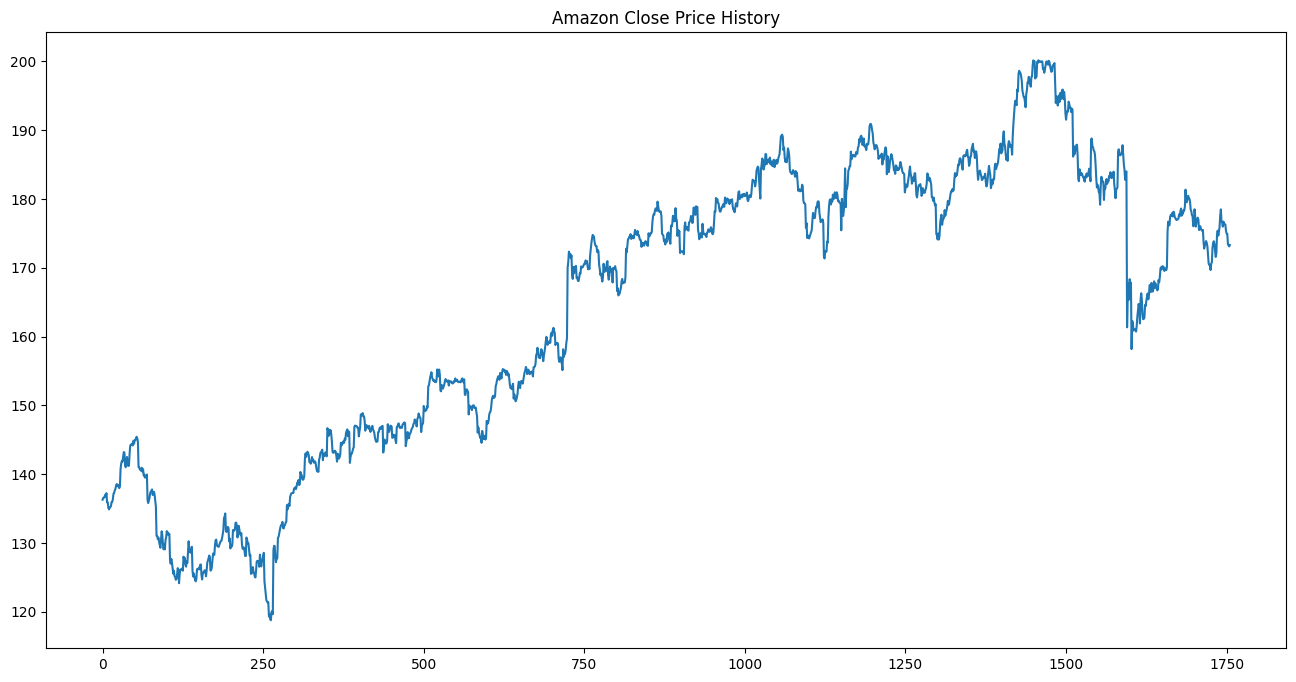

In [ ]:
# plot Close values of data
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
# Add a title
plt.title('Amazon Close Price History')


In [ ]:
MA_10=data.Close.rolling(10).mean()
MA_10
MA_50=data.Close.rolling(50).mean()
MA_50
MA_100=data.Close.rolling(100).mean()
MA_100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1751,175.731385
1752,175.764385
1753,175.801385
1754,175.834203


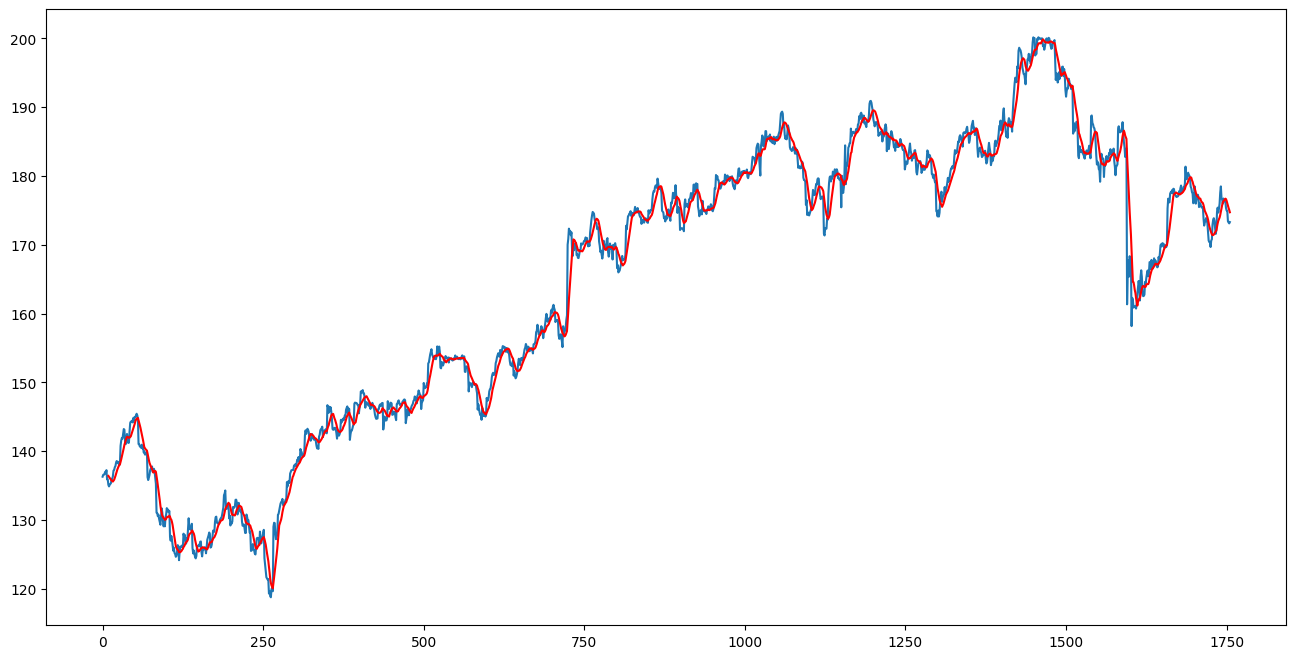

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
plt.plot(MA_10,'r',label='Moving Average 10')

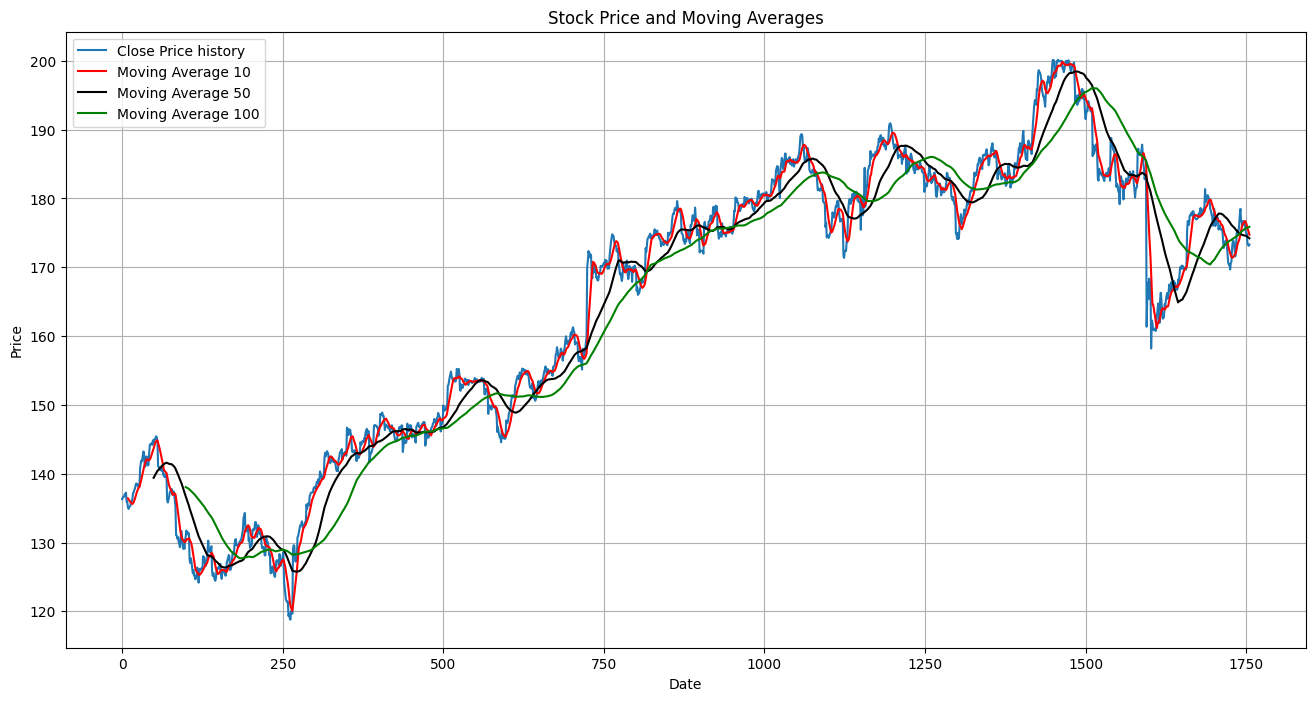

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
plt.plot(MA_10,'r',label='Moving Average 10')
plt.plot(MA_50,'black',label='Moving Average 50')
plt.plot(MA_100,'g',label='Moving Average 100')


plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if necessary
data = data.fillna(method='ffill')  # Forward fill

# Create additional features (e.g., moving average)
#data['Moving_Avg_3h'] = data['Close'].rolling(window=3).mean()


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


<ipython-input-15-65f17ef6c261>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill


In [ ]:
data.shape
data

,Open,High,Low,Close,Volume
0,137.729996,137.800003,135.820007,136.300003,9737816
1,136.300003,137.039993,136.130005,136.574997,6143806
2,136.578094,136.850006,136.300003,136.574997,3968091
3,136.580002,136.910004,136.539993,136.690002,2195552
4,136.690002,137.079895,136.630005,137.009995,2655191
...,...,...,...,...,...
1751,174.960007,175.169998,174.419998,174.919998,1995345
1752,174.914993,175.199997,173.360001,173.419998,2217399
1753,173.410004,173.551407,172.729996,173.235001,2567348
1754,173.229996,173.395004,172.539993,173.110001,3396381


In [ ]:
#Split data into training and testing intime series
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.80)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.80):int(len(data))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(1404, 1)
(352, 1)


In [ ]:
data_training

,Close
0,136.300003
1,136.574997
2,136.574997
3,136.690002
4,137.009995
...,...
1399,186.619995
1400,186.856598
1401,187.044998
1402,189.119995


In [ ]:
data_testing

,Close
1404,188.039993
1405,187.650101
1406,186.535004
1407,185.699997
1408,186.375000
...,...
1751,174.919998
1752,173.419998
1753,173.235001
1754,173.110001


In [ ]:
# Scale the values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.2429036 ],
       [0.24671622],
       [0.24671622],
       ...,
       [0.94645036],
       [0.97521886],
       [0.98492408]])

In [ ]:
# Assuming y_predicted is a 1D array (e.g., shape (n,))
#y_predicted_original = scaler.inverse_transform(data_training_array.reshape(-1, 1))
#y_predicted_original = y_predicted_original.flatten()  # To convert back to 1D array if needed
#y_predicted_original

In [ ]:
X_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - loss: 0.1819
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - loss: 0.0177
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - loss: 0.0141
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - loss: 0.0109
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 358ms/step - loss: 0.0104
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - loss: 0.0088
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - loss: 0.0099
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - loss: 0.0106
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 287ms/step - loss: 0.0126
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 0.0090
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - loss: 0.0090
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - loss: 0.0087
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - loss: 0.0073
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - loss: 0.0084
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1404,188.039993
1405,187.650101
1406,186.535004
1407,185.699997
1408,186.375000


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
#final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
import pandas as pd

# Combine past_100_days and data_testing using pd.concat
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

,Close
0,176.464996
1,177.210007
2,177.710007
3,176.244995
4,176.889999


In [ ]:
imput_data=scaler.fit_transform(final_df)
imput_data

array([[0.43560111],
       [0.45335424],
       [0.46526894],
       [0.43035861],
       [0.44572867],
       [0.45049447],
       [0.45573696],
       [0.48123458],
       [0.46169431],
       [0.47480054],
       [0.48123458],
       [0.49505566],
       [0.51316587],
       [0.49922552],
       [0.50434911],
       [0.52102961],
       [0.53580371],
       [0.54628869],
       [0.54426304],
       [0.55367574],
       [0.54748024],
       [0.55010148],
       [0.58536887],
       [0.60931752],
       [0.59752172],
       [0.60252605],
       [0.60157268],
       [0.61872986],
       [0.63898498],
       [0.63588705],
       [0.65518879],
       [0.66078871],
       [0.65721445],
       [0.64351262],
       [0.63386175],
       [0.62135111],
       [0.66817612],
       [0.67081155],
       [0.67115225],
       [0.66758017],
       [0.67043994],
       [0.68366508],
       [0.69009911],
       [0.66805686],
       [0.66174209],
       [0.63433808],
       [0.64266905],
       [0.666

In [ ]:
imput_data.shape

(452, 1)

In [ ]:
X_test=[]
y_test=[]

for i in range(100,imput_data.shape[0]):
    X_test.append(imput_data[i-100:i])
    y_test.append(imput_data[i,0])

In [ ]:
X_test,y_test=np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(352, 100, 1)
(352,)


In [ ]:
y_test

array([0.71142615, 0.70213525, 0.67556317, 0.65566548, 0.67175038,
       0.65185269, 0.70716576, 0.72000474, 0.71359252, 0.69951146,
       0.70618402, 0.70034557, 0.67329935, 0.73846328, 0.78053631,
       0.81341843, 0.84248776, 0.86018127, 0.8502326 , 0.84439415,
       0.89896365, 0.8922889 , 0.95305609, 0.96374615, 0.9577888 ,
       0.95543917, 0.9457883 , 0.92994192, 0.89560355, 0.8831169 ,
       0.87275118, 0.87251302, 0.85404502, 0.83724563, 0.88228315,
       0.8963424 , 0.92291193, 0.92684398, 0.94269036, 0.91993326,
       0.92946523, 0.90851453, 0.94173735, 0.94400117, 0.98261192,
       0.99976184, 0.99579415, 0.99690243, 0.93685482, 0.94304779,
       0.94257146, 0.99475751, 0.99108798, 1.        , 0.9952342 ,
       0.9951462 , 0.99404265, 0.99618757, 0.99559417, 0.99594905,
       0.96997511, 0.97343047, 0.95683797, 0.96663901, 0.97950672,
       0.99451934, 0.99618757, 0.99237479, 0.98439178, 0.99809397,
       0.9951153 , 0.98117495, 0.97021327, 0.96008607, 0.96234

In [ ]:
X_test

array([[[0.43560111],
        [0.45335424],
        [0.46526894],
        ...,
        [0.68771603],
        [0.73716193],
        [0.75384279]],

       [[0.45335424],
        [0.46526894],
        [0.43035861],
        ...,
        [0.73716193],
        [0.75384279],
        [0.71142615]],

       [[0.46526894],
        [0.43035861],
        [0.44572867],
        ...,
        [0.75384279],
        [0.71142615],
        [0.70213525]],

       ...,

       [[0.27046365],
        [0.27745037],
        [0.27951857],
        ...,
        [0.39973813],
        [0.39878475],
        [0.36304068]],

       [[0.27745037],
        [0.27951857],
        [0.27344232],
        ...,
        [0.39878475],
        [0.36304068],
        [0.3586323 ]],

       [[0.27951857],
        [0.27344232],
        [0.28345062],
        ...,
        [0.36304068],
        [0.3586323 ],
        [0.35565362]]])

In [ ]:
#Making Predictions
y_predicted=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step


In [ ]:
y_predicted.shape

(352, 1)

In [ ]:
#y_predicted

In [ ]:
y_test.shape

(352,)

In [ ]:
import numpy as np

# Assuming y_test is a NumPy array
y_test_reshaped = y_test.reshape(-1, 1)
y_test_reshaped.shape

(352, 1)

In [ ]:
#y_test

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
y_predicted_Original = scaler.inverse_transform(y_predicted)
y_predicted_Original

array([[186.2514 ],
       [186.51447],
       [186.77602],
       [187.02274],
       [187.24046],
       [187.42192],
       [187.56169],
       [187.66644],
       [187.74817],
       [187.81718],
       [187.87895],
       [187.93709],
       [187.9927 ],
       [188.04163],
       [188.08925],
       [188.14862],
       [188.23573],
       [188.36618],
       [188.5506 ],
       [188.79   ],
       [189.07748],
       [189.40965],
       [189.77965],
       [190.18651],
       [190.62881],
       [191.1002 ],
       [191.58994],
       [192.08385],
       [192.56534],
       [193.01451],
       [193.41429],
       [193.75296],
       [194.02603],
       [194.23228],
       [194.37224],
       [194.45653],
       [194.50055],
       [194.52284],
       [194.53926],
       [194.563  ],
       [194.59908],
       [194.6492 ],
       [194.7094 ],
       [194.77911],
       [194.85825],
       [194.95113],
       [195.06342],
       [195.1975 ],
       [195.35213],
       [195.51451],


In [ ]:
# Reshape y_test to be a 2D array
y_test_reshaped = y_test.reshape(-1, 1)
y_test_reshaped.shape

(352, 1)

In [ ]:


# Convert the scaled y_test back to its original scale
y_test_Original = scaler.inverse_transform(y_test_reshaped)

# Optionally, flatten the array
y_test_Original = y_test_Original.flatten()
y_test_Original= y_test_Original.reshape(-1, 1)
# Print or use the original y_test
print("Original y_test:", y_test_Original)


Original y_test: [[188.03999329]
 [187.65010071]
 [186.53500366]
 [185.69999695]
 [186.375     ]
 [185.53999329]
 [187.86120605]
 [188.3999939 ]
 [188.13090515]
 [187.53999329]
 [187.82000732]
 [187.57499695]
 [186.44000244]
 [189.17460632]
 [190.94020081]
 [192.32009888]
 [193.53999329]
 [194.28250122]
 [193.86500549]
 [193.61999512]
 [195.91000366]
 [195.62989807]
 [198.17999268]
 [198.62860107]
 [198.37860107]
 [198.27999878]
 [197.875     ]
 [197.21000671]
 [195.76899719]
 [195.24499512]
 [194.80999756]
 [194.80000305]
 [194.0249939 ]
 [193.32000732]
 [195.21000671]
 [195.80000305]
 [196.91499329]
 [197.08000183]
 [197.74499512]
 [196.78999329]
 [197.19000244]
 [196.31080627]
 [197.70500183]
 [197.80000305]
 [199.42030334]
 [200.13999939]
 [199.97349548]
 [200.02000427]
 [197.50010681]
 [197.75999451]
 [197.74000549]
 [199.92999268]
 [199.77600098]
 [200.1499939 ]
 [199.94999695]
 [199.94630432]
 [199.8999939 ]
 [199.99000549]
 [199.96510315]
 [199.97999573]
 [198.88999939]
 [199.0

In [ ]:
#scaler.scale_

In [ ]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data)


In [ ]:
#scale_factor=1/0.02382938
#y_predicted=y_predicted*scale_factor
#y_test=y_test*scale_factor

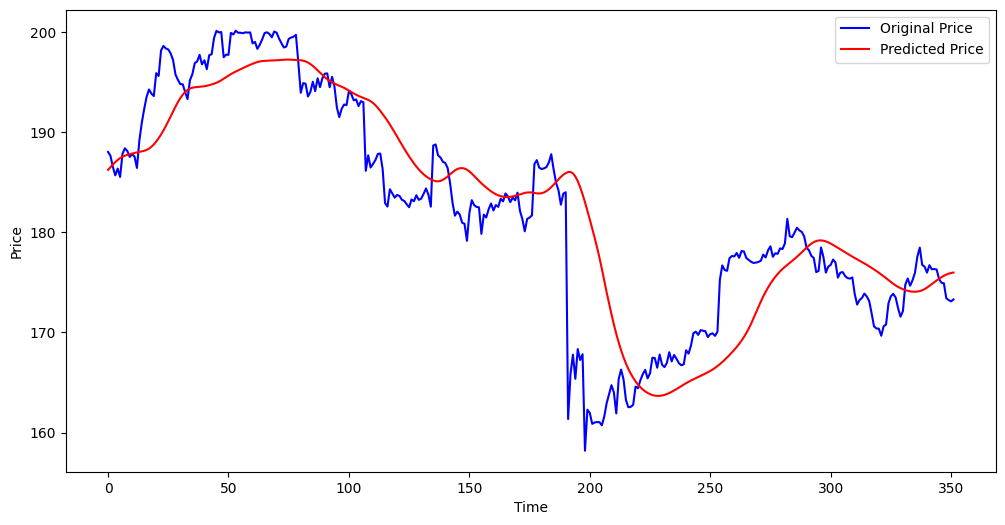

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_Original,'b',label='Original Price')
plt.plot(y_predicted_Original,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Incorporate Accuracy Metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_test_original_reshape and y_predicted_original are already defined
mse = mean_squared_error(y_test_Original, y_predicted_Original)
mae = mean_absolute_error(y_test_Original, y_predicted_Original)
rmse = np.sqrt(mse)

# Calculate MAPE
# Avoid division by zero by adding a small constant (e.g., 1e-10)
mape = np.mean(np.abs((y_test_Original - y_predicted_Original) / (y_test_Original + 1e-10))) * 100

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}%")


Mean Squared Error: 30.002628363302474
Mean Absolute Error: 3.824589642611417
Root Mean Squared Error: 5.477465505441589
Mean Absolute Percentage Error: 2.163061032039047%


In [ ]:
#Forecast Future Prices:

In [ ]:
last_sequence = imput_data[-100:]  # Last 100 values for the next prediction
last_sequence = np.expand_dims(last_sequence, axis=0)

next_prediction = model.predict(last_sequence)
# Rescale the prediction back to the original scale
next_prediction_Original = scaler.inverse_transform(next_prediction)

print(f"Next prediction in original scale: {next_prediction_Original}")
print(f"Next hour predicted price: ${next_prediction_Original[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
Next prediction in original scale: [[176.00026]]
Next hour predicted price: $176.00025939941406


In [ ]:
#Create the Dashboard with Dash

In [ ]:
pip install dash


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
import pandas as pd

# Sample data (replace with your actual data)
time = np.arange(len(y_test_Original))
original_price = y_test_Original.flatten()
predicted_price = y_predicted_Original.flatten()

# Last 100 values for the next prediction
last_sequence = imput_data[-100:]  # Example, replace with actual data
last_sequence = np.expand_dims(last_sequence, axis=0)

# Make prediction for the next hour
next_prediction = model.predict(last_sequence)
next_prediction_Original = scaler.inverse_transform(next_prediction)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),
    dcc.Graph(
        id='price-graph',
        figure={
            'data': [
                go.Scatter(x=time, y=original_price, mode='lines', name='Original Price'),
                go.Scatter(x=time, y=predicted_price, mode='lines', name='Predicted Price')
            ],
            'layout': go.Layout(
                title='Amazon Stock Prices vs Predicted Prices',
                xaxis={'title': 'Time'},
                yaxis={'title': 'Price'},
                height=600
            )
        }
    ),
    html.Div([
        html.H3("Next Hour Prediction:"),
        html.Div(id='next-prediction', children=f"${next_prediction_Original[0][0]:.2f}")
    ])
])

# Define a callback (if needed)
@app.callback(
    Output('next-prediction', 'children'),
    Input('price-graph', 'relayoutData')
)
def update_next_prediction(_):
    # Return the latest next prediction value
    return f"${next_prediction_Original[0][0]:.2f}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import dash_table

# Sample data (replace with your actual data)
time = np.arange(len(y_test_Original))
original_price = y_test_Original.flatten()
predicted_price = y_predicted_Original.flatten()

# Last 100 values for the next prediction
last_sequence = imput_data[-100:]  # Example, replace with actual data
last_sequence = np.expand_dims(last_sequence, axis=0)

# Make prediction for the next hour
next_prediction = model.predict(last_sequence)
next_prediction_Original = scaler.inverse_transform(next_prediction)

# Create a DataFrame for the table
table_data = pd.DataFrame({
    'Time': time,
    'Original Price': original_price,
    'Predicted Price': predicted_price
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),
    dcc.Graph(
        id='price-graph',
        figure={
            'data': [
                go.Scatter(x=time, y=original_price, mode='lines', name='Original Price'),
                go.Scatter(x=time, y=predicted_price, mode='lines', name='Predicted Price')
            ],
            'layout': go.Layout(
                title='Stock Prices vs Predicted Prices',
                xaxis={'title': 'Time'},
                yaxis={'title': 'Price'},
                height=600
            )
        }
    ),
    html.Div([
        html.H3("Next Hour Prediction:"),
        html.Div(id='next-prediction', children=f"${next_prediction_Original[0][0]:.2f}")
    ]),
    html.Div([
        html.H3("Stock Prices Table:"),
        dash_table.DataTable(
            id='price-table',
            columns=[{'name': col, 'id': col} for col in table_data.columns],
            data=table_data.to_dict('records'),
            style_table={'height': '300px', 'overflowY': 'auto'},
            style_cell={'textAlign': 'left', 'padding': '5px'},
            style_header={
                'backgroundColor': 'rgb(230, 230, 230)',
                'fontWeight': 'bold'
            }
        )
    ])
])

# Define a callback (if needed)
@app.callback(
    Output('next-prediction', 'children'),
    Input('price-graph', 'relayoutData')
)
def update_next_prediction(_):
    # Return the latest next prediction value
    return f"${next_prediction_Original[0][0]:.2f}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


<IPython.core.display.Javascript object>